# Combining OPLS2005 nonbonding parameters with OFF

In [1]:
import os
os.environ["SCHRODINGER"] = "/opt/schrodinger/suites2020-2/"

In [2]:
from offpele.topology import Molecule

 - Constructing molecule from a SMILES tag with RDKit


 - Generating rotamer library


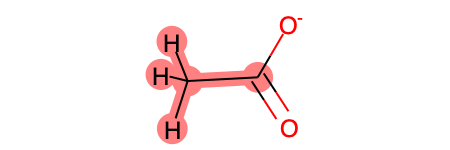

In [3]:
molecule = Molecule(smiles='CC(=O)[O-]')
molecule.rdkit_molecule

In [4]:
atoms = molecule.rdkit_molecule.GetAtoms()
for atom in atoms:
    print(atom.GetSymbol())

C
C
O
O
H
H
H


In [5]:
from offpele.utils.toolkits import SchrodingerToolkitWrapper

In [6]:
schrodinger_toolkit = SchrodingerToolkitWrapper()
OPLS_params = schrodinger_toolkit.get_OPLS_parameters(molecule)

In [7]:
OPLS_params['atom_types']

['CT', 'CO3', 'O2Z', 'O2Z', 'HC', 'HC', 'HC']

In [8]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml', use_OPLS_bonds_and_angles=True)

 - Loading forcefield
 - Computing partial charges with am1bcc


In [9]:
atoms = molecule.atoms
for atom in atoms:
    print(atom.PDB_name)

_C1_
_C2_
_O1_
_O2_
_H1_
_H2_
_H3_


In [10]:
molecule.add_OPLS_nonbonding_params()

In [11]:
from offpele.template import Impact

impact_template = Impact(molecule)
impact_template.write('test')

In [6]:
from simtk import unit

a = unit.Quantity(1, unit.angstrom)

In [4]:
molecule.to_pdb_file('met.pdb')

In [23]:
molecule = Molecule(smiles='C=CCO')
molecule.parameterize('openff_unconstrained-1.2.0.offxml')

 - Constructing molecule from a SMILES tag with RDKit
 - Generating rotamer library
 - Loading forcefield
 - Computing partial charges with am1bcc


In [18]:
molecule.propers

[Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=3, constant=0.1703506220295 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=10, constant=0.05630164829856 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=11, constant=0.05630164829856 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=1, atom2_idx=2, atom3_idx=3, atom4_idx=4, constant=0.1787345451317 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=1, atom2_idx=2, atom3_idx=3, atom4_idx=12, constant=0.05630164829856 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=1, atom2_idx=2, atom3_idx=3, atom4_idx=13, constant=0.05630164829856 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=2, atom2_idx=1, atom3_idx=0, atom4_idx=5, constant=0.05630164829856 kcal/mol, prefactor=1, periodicity=3),
 Proper(atom1_idx=2, atom2_idx=1, atom3_idx=0, atom4_idx=6, constant=0.05630164829856 kcal/mol, prefactor=1, periodicity=3)

In [24]:
dict(molecule.parameters['ProperTorsions'])

{(0,
  1,
  2,
  3): <ProperTorsionType with smirks: [*:1]-[#6X4:2]-[#6X3:3]=[*:4]  periodicity1: 2  phase1: 0.0 deg  id: t20  k1: -0.3997707339638 kcal/mol  idivf1: 1.0  >,
 (0,
  1,
  2,
  7): <ProperTorsionType with smirks: [#1:1]-[#6X4:2]-[#6X3:3]=[#6X3:4]  periodicity1: 3  periodicity2: 1  phase1: 180.0 deg  phase2: 0.0 deg  id: t19  k1: 0.1601667655315 kcal/mol  k2: -0.006328248045669 kcal/mol  idivf1: 1.0  idivf2: 1.0  >,
 (0,
  1,
  2,
  8): <ProperTorsionType with smirks: [#1:1]-[#6X4:2]-[#6X3:3]=[#6X3:4]  periodicity1: 3  periodicity2: 1  phase1: 180.0 deg  phase2: 0.0 deg  id: t19  k1: 0.1601667655315 kcal/mol  k2: -0.006328248045669 kcal/mol  idivf1: 1.0  idivf2: 1.0  >,
 (1,
  2,
  3,
  9): <ProperTorsionType with smirks: [*:1]-[#6X4:2]-[#8X2:3]-[#1:4]  periodicity1: 3  phase1: 0.0 deg  id: t84  k1: 0.7065108173684 kcal/mol  idivf1: 3.0  >,
 (2,
  1,
  0,
  4): <ProperTorsionType with smirks: [*:1]-,:[#6X3:2]=[#6X3:3]-,:[*:4]  periodicity1: 2  phase1: 180.0 deg  id: t45  k

In [26]:
dict(molecule.parameters['ImproperTorsions'])

{(0,
  1,
  2,
  6): <ImproperTorsionType with smirks: [*:1]~[#6X3:2](~[*:3])~[*:4]  periodicity1: 2  phase1: 180.0 deg  k1: 1.1 kcal/mol  id: i1  >,
 (1,
  0,
  4,
  5): <ImproperTorsionType with smirks: [*:1]~[#6X3:2](~[*:3])~[*:4]  periodicity1: 2  phase1: 180.0 deg  k1: 1.1 kcal/mol  id: i1  >}

In [27]:
molecule.impropers

[Improper(atom1_idx=0, atom2_idx=1, atom3_idx=2, atom4_idx=6, constant=1.1 kcal/mol, prefactor=-1, periodicity=2),
 Improper(atom1_idx=1, atom2_idx=0, atom3_idx=4, atom4_idx=5, constant=1.1 kcal/mol, prefactor=-1, periodicity=2)]

In [7]:
periodicities = molecule.parameters.get_dihedral_periodicities()
phases = molecule.parameters.get_dihedral_phases()
ks = molecule.parameters.get_dihedral_ks()
idivfs = molecule.parameters.get_dihedral_idivfs()

for pe, ph, k, d in zip(periodicities, phases, ks, idivfs):
    print(pe, ph, k, d)

{(0, 1, 2, 3): 3, (0, 1, 2, 10): 3, (0, 1, 2, 11): 3, (1, 2, 3, 4): 3, (1, 2, 3, 12): 3, (1, 2, 3, 13): 3, (2, 1, 0, 5): 3, (2, 1, 0, 6): 3, (2, 1, 0, 7): 3, (2, 3, 4, 14): 3, (3, 2, 1, 8): 3, (3, 2, 1, 9): 3, (4, 3, 2, 10): 3, (4, 3, 2, 11): 3, (5, 0, 1, 8): 3, (5, 0, 1, 9): 3, (6, 0, 1, 8): 3, (6, 0, 1, 9): 3, (7, 0, 1, 8): 3, (7, 0, 1, 9): 3, (8, 1, 2, 10): 3, (8, 1, 2, 11): 3, (9, 1, 2, 10): 3, (9, 1, 2, 11): 3, (10, 2, 3, 12): 3, (10, 2, 3, 13): 3, (11, 2, 3, 12): 3, (11, 2, 3, 13): 3, (12, 3, 4, 14): 3, (13, 3, 4, 14): 3} {(0, 1, 2, 3): Quantity(value=0.0, unit=degree), (0, 1, 2, 10): Quantity(value=0.0, unit=degree), (0, 1, 2, 11): Quantity(value=0.0, unit=degree), (1, 2, 3, 4): Quantity(value=0.0, unit=degree), (1, 2, 3, 12): Quantity(value=0.0, unit=degree), (1, 2, 3, 13): Quantity(value=0.0, unit=degree), (2, 1, 0, 5): Quantity(value=0.0, unit=degree), (2, 1, 0, 6): Quantity(value=0.0, unit=degree), (2, 1, 0, 7): Quantity(value=0.0, unit=degree), (2, 3, 4, 14): Quantity(value

In [12]:
for index in periodicities[0].keys():
    print(periodicities[1][index])
    print(phases[1][index])
    print(ks[1][index])
    print(idivfs[1][index])
    print(bool(periodicities[1][index] and phases[1][index] and ks[1][index] and idivfs[1][index]))

2
180.0 deg
0.198190228795 kcal/mol
1.0
True
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
1
0.0 deg
0.01707655737107 kcal/mol
1.0
False
None
None
None
None
False
None
None
None
None
False
1
0.0 deg
0.3925917084552 kcal/mol
1.0
False
1
0.0 deg
0.3925917084552 kcal/mol
1.0
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False
None
None
None
None
False


In [13]:
periodicities[0][(7, 10 , 1, 11)]

KeyError: (7, 10, 1, 11)